In [39]:
# Import quick EDA Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from preprocessor import preprocess_data
from data_explorer import quick_explore

In [3]:
# Identify the dataset
folder_name = 'Transportation/google'

def quick_explore1(folder = 'folder_name'):
    directory = '../../data/'+folder+'/'
    
    for filename in os.listdir(directory):

        filepath = os.path.join(directory, filename)
        
        # Read CSV files
        if filename.endswith('.csv'):
            raw_df = pd.read_csv(filepath, infer_datetime_format = True)
            neg_index = 4
            
        # Read Excel files
        elif filename.endswith('.xlsx'):
            raw_df = pd.read_excel(filepath, infer_datetime_format = True)
            neg_index = 5
            
        # Skip other file types
        else:
            continue

        print()
        print('--------------'*8)
        print('--------------'*8)
        print(filename[:-neg_index].upper())
        print()

        df, redund_dict = preprocess_data(raw_df)
    return df, redund_dict


----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
GOOGLE_MOBILITY_US

Group By: Indicator


Value                \
                                                       count   mean    std   
Indicator                                                                    
GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE   562386.0  -0.28  15.38   
PARKS PERCENT CHANGE FROM BASELINE                  238561.0  20.38  60.27   
RESIDENTIAL PERCENT CHANGE FROM BASELINE            511289.0   8.33   5.88   
RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  630575.0 -11.28  19.57   
TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       366022.0 -13.91  26.19   
WORKPLACES PERCENT CHANGE FROM BASELINE             934447.0 -23.31  15.06   

                                                                             \
                                                      min   25%   50%   75%   
Indicator                                                                     
GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE   -96.0  -9.0  -1.0   8.0   
PARKS PERCENT CHANGE FROM BASELINE                  -95.0 -20.0   7.0  44.0   
RESIDENTIAL PERCENT CHANGE FROM BASELINE            -46.0   4.0   7.0  11.0   
RETAIL AND RECREATION PERECENT CHANGE FROM BASE... -100.0 -22.0 -10.0   1.0   
TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       -93.0 -32.0 -12.0   4.0   
WORKPLACES PERCENT CHANGE FROM BASELINE             -94.0 -32.0 -23.0 -14.0   

                                                           
                                                      max  
Indicator                                                  
GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE   225.0  
PARKS PERCENT CHANGE FROM BASELINE                  709.0  
RESIDENTIAL PERCENT CHANGE FROM BASELINE             46.0  
RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  261.0  
TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       258.0  
WORKPLACES PERCENT CHANGE FROM BASELINE              66.0

{'Sub-Sector': 'GOOGLE MOBILITY INDEX',
 'Super Region': 'GLOBAL DATA',
 'Sector': 'TRANSPORTATION',
 'Frequency': 'DAILY',
 'Country Region': 'UNITED STATES',
 'Unit': 'INDEX',
 'Source': 'GOOGLE LLC',
 'Super Region.1': 'GLOBAL DATA',
 'Period Value': 'd'}

,Sub Region 2,Sub Region 1,Indicator,Value,Date Value
0,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-19.0,2021-03-02
1,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-19.0,2021-03-01
2,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-12.0,2021-02-28
3,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-11.0,2021-02-27
4,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-20.0,2021-02-26
...,...,...,...,...,...
3243275,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,6.0,2020-02-19
3243276,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,-7.0,2020-02-18
3243277,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,4.0,2020-02-17
3243278,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,14.0,2020-02-16



Sub Region 2 Distribution:


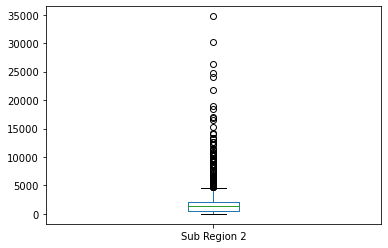

count               3127056
unique                 1717
top       WASHINGTON COUNTY
freq                  34734
Name: Sub Region 2, dtype: object


Sub Region 1 Distribution:


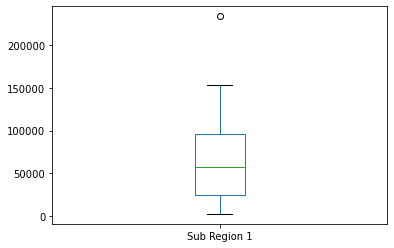

count     3241018
unique         51
top         TEXAS
freq       234186
Name: Sub Region 1, dtype: object


Value Distribution:


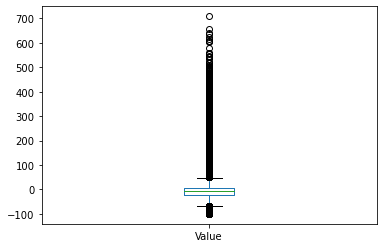

count    3.243280e+06
mean    -7.715772e+00
std      2.675634e+01
min     -1.000000e+02
25%     -2.300000e+01
50%     -8.000000e+00
75%      6.000000e+00
max      7.090000e+02
Name: Value, dtype: float64


Date Value Distribution:


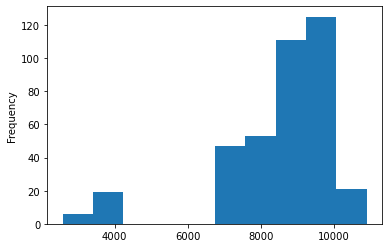

count                 3243280
unique                    382
top       2020-03-27 00:00:00
freq                    10899
first     2020-02-15 00:00:00
last      2021-03-02 00:00:00
Name: Date Value, dtype: object

In [4]:
# Identify the dataset
folder_name = 'Transportation/google'
# Explore all CSV data in folder, plot distributions of values and dates
df, redund_dict = quick_explore1(folder = folder_name)

In [5]:
df_groupby = df.groupby(['Date Value', 'Sub Region 1', 'Indicator']).describe()
display(df_groupby.head(25))

# Save it cause its big and slow
df_groupby.to_csv(r'../../data/transportation/google/groupby_date_state_indicator_describe_value.csv',
                  index = False)

Value  \
                                                                           count   
Date Value Sub Region 1 Indicator                                                  
2020-02-15 ALABAMA      GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE   59.0   
                        PARKS PERCENT CHANGE FROM BASELINE                  14.0   
                        RESIDENTIAL PERCENT CHANGE FROM BASELINE            15.0   
                        RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  56.0   
                        TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       20.0   
...                                                                          ...   
2021-03-02 WYOMING      PARKS PERCENT CHANGE FROM BASELINE                   4.0   
                        RESIDENTIAL PERCENT CHANGE FROM BASELINE            10.0   
                        RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  11.0   
                        TRANSIT STATIONS PERCENT CHANGE FROM BASELINE        8.0   
                        WORKPLACES PERCENT CHANGE FROM BASELINE             21.0   

                                                                                       \
                                                                                 mean   
Date Value Sub Region 1 Indicator                                                       
2020-02-15 ALABAMA      GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE    0.254237   
                        PARKS PERCENT CHANGE FROM BASELINE                  49.571429   
                        RESIDENTIAL PERCENT CHANGE FROM BASELINE            -1.266667   
                        RETAIL AND RECREATION PERECENT CHANGE FROM BASE...   5.339286   
                        TRANSIT STATIONS PERCENT CHANGE FROM BASELINE        6.050000   
...                                                                               ...   
2021-03-02 WYOMING      PARKS PERCENT CHANGE FROM BASELINE                   8.500000   
                        RESIDENTIAL PERCENT CHANGE FROM BASELINE             3.400000   
                        RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  -6.727273   
                        TRANSIT STATIONS PERCENT CHANGE FROM BASELINE        8.500000   
                        WORKPLACES PERCENT CHANGE FROM BASELINE            -13.190476   

                                                                                       \
                                                                                  std   
Date Value Sub Region 1 Indicator                                                       
2020-02-15 ALABAMA      GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE    7.283882   
                        PARKS PERCENT CHANGE FROM BASELINE                  23.721831   
                        RESIDENTIAL PERCENT CHANGE FROM BASELINE             0.457738   
                        RETAIL AND RECREATION PERECENT CHANGE FROM BASE...   6.028046   
                        TRANSIT STATIONS PERCENT CHANGE FROM BASELINE        5.799047   
...                                                                               ...   
2021-03-02 WYOMING      PARKS PERCENT CHANGE FROM BASELINE                   5.322906   
                        RESIDENTIAL PERCENT CHANGE FROM BASELINE             2.170509   
                        RETAIL AND RECREATION PERECENT CHANGE FROM BASE...   7.015567   
                        TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       16.361977   
                        WORKPLACES PERCENT CHANGE FROM BASELINE              4.833415   

                                                                                  \
                                                                             min   
Date Value Sub Region 1 Indicator                                                  
2020-02-15 ALABAMA      GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE  -18.0   
                        PARKS PERCENT CHANGE FROM BASELINE          

In [6]:
redund_dict

{'Sub-Sector': 'GOOGLE MOBILITY INDEX',
 'Super Region': 'GLOBAL DATA',
 'Sector': 'TRANSPORTATION',
 'Frequency': 'DAILY',
 'Country Region': 'UNITED STATES',
 'Unit': 'INDEX',
 'Source': 'GOOGLE LLC',
 'Super Region.1': 'GLOBAL DATA',
 'Period Value': 'd'}

In [7]:
indicator_US = df.groupby(['Date Value', 'Indicator']).describe()
indicator_US

Value  \
                                                                count   
Date Value Indicator                                                    
2020-02-15 GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE   2263.0   
           PARKS PERCENT CHANGE FROM BASELINE                   789.0   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE             505.0   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  2344.0   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE        937.0   
...                                                               ...   
2021-03-02 PARKS PERCENT CHANGE FROM BASELINE                   679.0   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE            1799.0   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  1598.0   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       1012.0   
           WORKPLACES PERCENT CHANGE FROM BASELINE             2766.0   

                                                                          \
                                                                    mean   
Date Value Indicator                                                       
2020-02-15 GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE    2.568272   
           PARKS PERCENT CHANGE FROM BASELINE                  17.078580   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE            -0.988119   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE...   6.767918   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE        4.553895   
...                                                                  ...   
2021-03-02 PARKS PERCENT CHANGE FROM BASELINE                  -3.674521   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE             7.000000   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  -7.359199   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE      -13.333004   
           WORKPLACES PERCENT CHANGE FROM BASELINE            -19.297542   

                                                                          \
                                                                     std   
Date Value Indicator                                                       
2020-02-15 GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE    8.768241   
           PARKS PERCENT CHANGE FROM BASELINE                  22.674342   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE             0.660580   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE...   9.913535   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       11.313592   
...                                                                  ...   
2021-03-02 PARKS PERCENT CHANGE FROM BASELINE                  29.001248   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE             3.413478   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE...  11.413606   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE       25.737102   
           WORKPLACES PERCENT CHANGE FROM BASELINE              8.870010   

                                                                           \
                                                                min   25%   
Date Value Indicator                                                        
2020-02-15 GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE  -52.0  -2.0   
           PARKS PERCENT CHANGE FROM BASELINE                 -56.0   4.0   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE            -3.0  -1.0   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE... -42.0   2.0   
           TRANSIT STATIONS PERCENT CHANGE FROM BASELINE      -61.0  -2.0   
...                                                             ...   ...   
2021-03-02 PARKS PERCENT CHANGE FROM BASELINE                 -78.0 -23.0   
           RESIDENTIAL PERCENT CHANGE FROM BASELINE             1.0   5.0   
           RETAIL AND RECREATION PERECENT CHANGE FROM BASE... -6

In [14]:
# MultiIndex Column Names, 2uples, like ( 'Value', 'metric' )
indicator_US.columns[0][1]

'count'

In [15]:
indicator_US.index[0][1]

'GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE'

In [16]:
df

,Sub Region 2,Sub Region 1,Indicator,Value,Date Value
0,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-19.0,2021-03-02
1,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-19.0,2021-03-01
2,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-12.0,2021-02-28
3,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-11.0,2021-02-27
4,MOBILE COUNTY,ALABAMA,WORKPLACES PERCENT CHANGE FROM BASELINE,-20.0,2021-02-26
...,...,...,...,...,...
3243275,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,6.0,2020-02-19
3243276,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,-7.0,2020-02-18
3243277,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,4.0,2020-02-17
3243278,ANTRIM COUNTY,MICHIGAN,GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE,14.0,2020-02-16


In [114]:
df_0.columns.to_list()

['workplaces',
 'retail and recreation ',
 'grocery and pharmacy',
 'residential',
 'transit stations',
 'parks']

In [121]:
google_indicators = list(df.Indicator.value_counts().index)
count = 0
for indicator in google_indicators:
    last_char = -29
    formated_name = indicator[:last_char].strip().lower()
    df_i = df[df['Indicator']==indicator].copy()
    df_i['date'] = df_i['Date Value']
    df_i = df_i.groupby(['date'], as_index=True).mean()
    df_i.rename(columns = {'Value': formated_name.replace(" ", "_")}, inplace = True)
    if count == 0:
        df_0 = df_i.copy()
    else:
        df_0 = pd.concat([df_0, df_i], axis =1)
    count += 1
display(round(df_0, 2))

,workplaces,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks
date,,,,,,
2020-02-15,0.50,6.77,2.57,-0.99,4.55,17.08
2020-02-16,0.57,8.23,2.72,-0.94,3.97,18.12
2020-02-17,-17.76,4.05,-0.38,4.41,1.90,28.27
2020-02-18,-0.01,-0.21,-1.38,1.35,2.44,5.47
2020-02-19,1.00,2.22,0.64,0.35,2.63,8.15
...,...,...,...,...,...,...
2021-02-26,-18.12,-11.03,-7.39,7.73,-13.96,-8.75
2021-02-27,-7.03,-7.17,-3.03,3.77,-10.17,8.13
2021-02-28,-10.87,-7.53,-5.26,3.69,-9.39,0.23


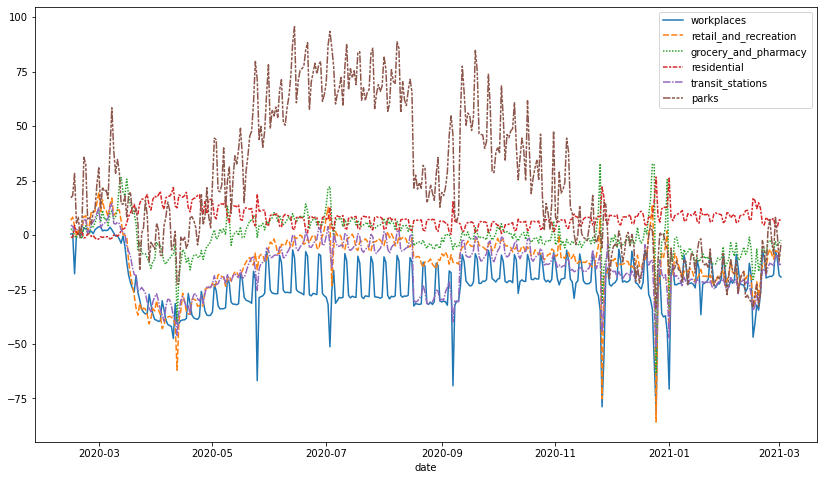

In [122]:
fig = plt.figure(figsize = (14, 8));
sns.lineplot(data = df_0);
#plt.legend( loc = 'upper right');

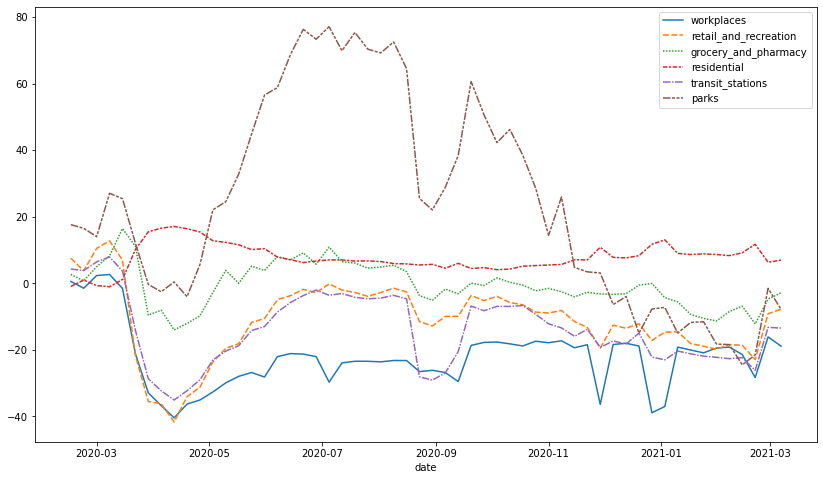

In [123]:
fig = plt.figure(figsize = (14, 8));
df_m = df_0.resample('W').mean()
sns.lineplot(data = df_m);

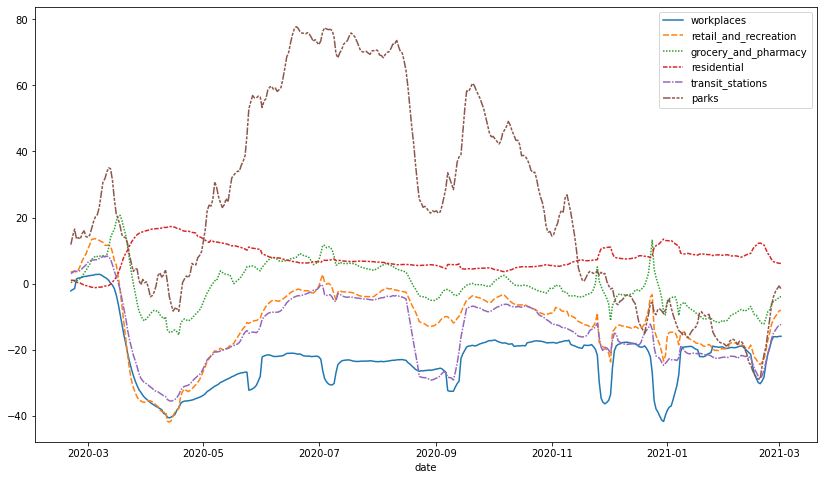

In [124]:
fig = plt.figure(figsize = (14, 8));
df_rm = df_0.rolling(7).mean()
sns.lineplot(data= df_rm);

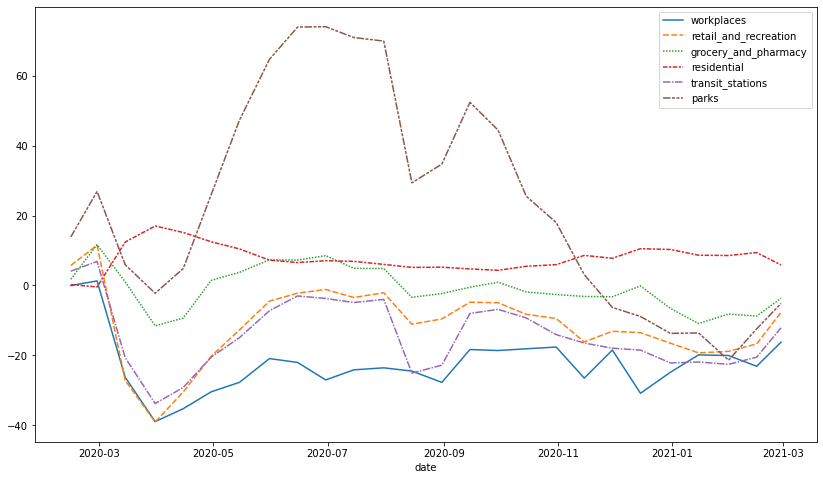

In [125]:
fig = plt.figure(figsize = (14, 8));
df_m = df_0.resample('SM').mean()
sns.lineplot(data = df_m);

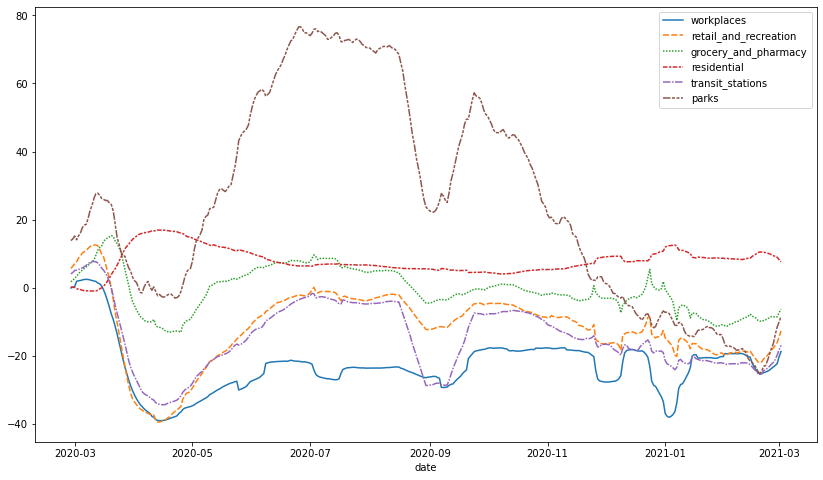

In [126]:
fig = plt.figure(figsize = (14, 8));
df_rm = df_0.rolling(14).mean()
sns.lineplot(data = df_rm);

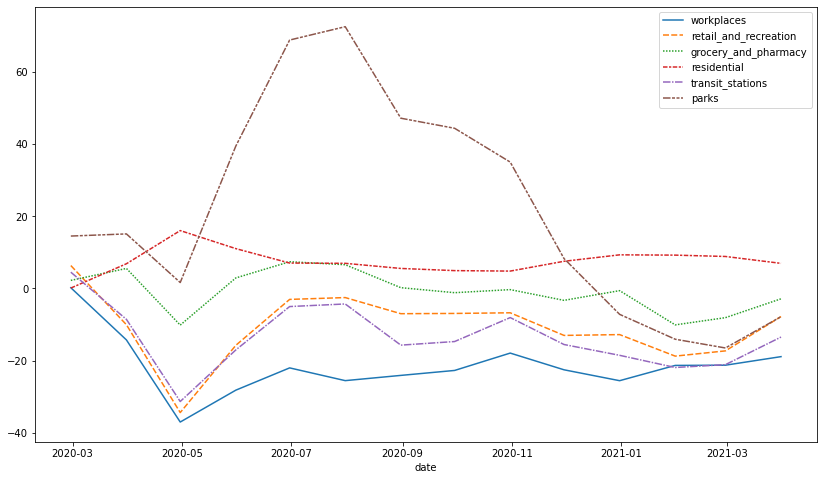

In [127]:
fig = plt.figure(figsize = (14, 8));
df_m = df_0.resample('M').mean()
sns.lineplot(data = df_m);

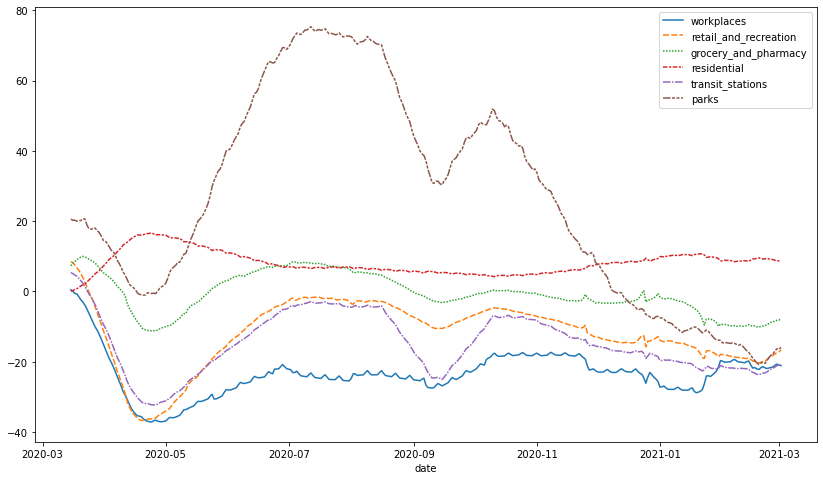

In [128]:
fig = plt.figure(figsize = (14, 8));
df_rm = df_0.rolling(30).mean()
sns.lineplot(data = df_rm);

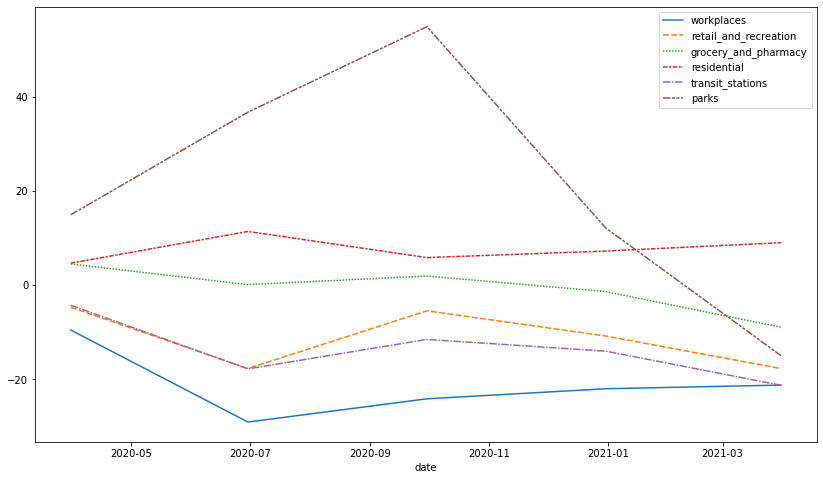

In [129]:
fig = plt.figure(figsize = (14, 8));
df_m = df_0.resample('Q').mean()
sns.lineplot(data = df_m);
plt.legend( loc = 'upper right');

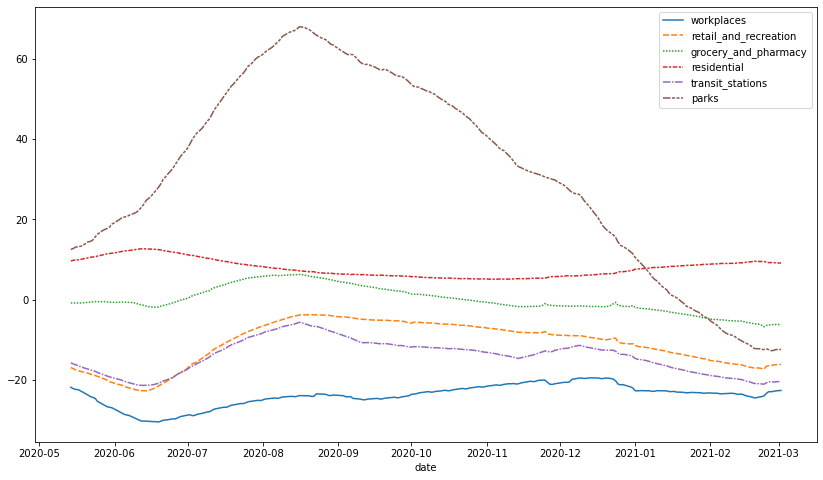

In [130]:
fig = plt.figure(figsize = (14, 8));
df_rm = df_0.rolling(90).mean()
sns.lineplot(data = df_rm);

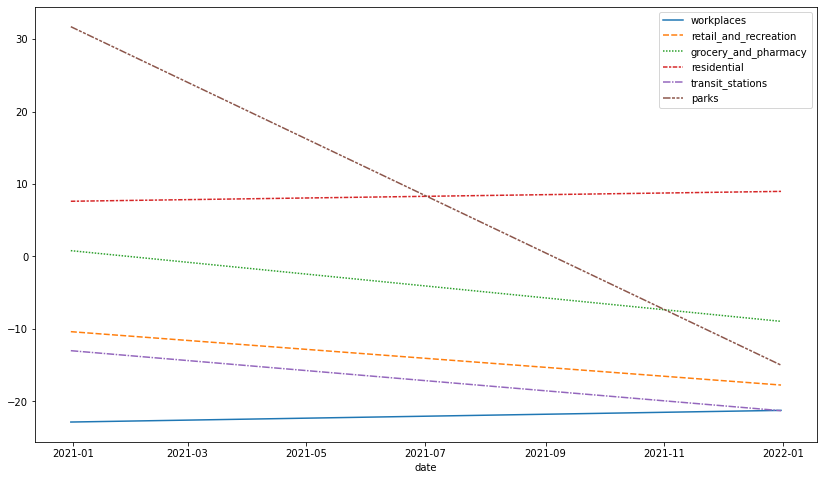

In [131]:
fig = plt.figure(figsize = (14, 8));
df_m = df_0.resample('Y').mean()
sns.lineplot(data = df_m);
plt.legend( loc = 'upper right');

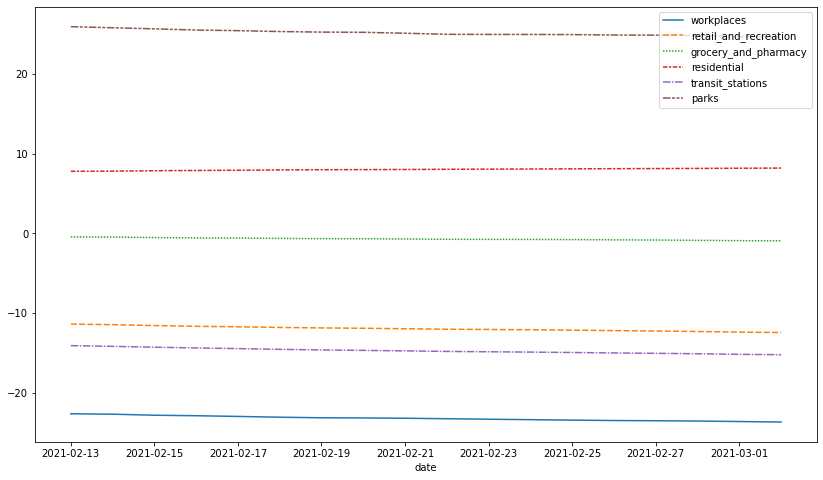

In [132]:
fig = plt.figure(figsize = (14, 8));
df_rm = df_0.rolling(365).mean()
sns.lineplot(data = df_rm);

In [133]:
df_0.to_csv(r'../../data/transportation/google/baseline_pct_change.csv',
                  index = True)

In [134]:
df_0

,workplaces,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks
date,,,,,,
2020-02-15,0.502403,6.767918,2.568272,-0.988119,4.553895,17.078580
2020-02-16,0.567077,8.225749,2.717209,-0.944541,3.967670,18.122368
2020-02-17,-17.756044,4.049697,-0.375113,4.405907,1.903259,28.271605
2020-02-18,-0.006305,-0.211659,-1.377153,1.345745,2.440042,5.466077
2020-02-19,1.001656,2.222899,0.639556,0.345455,2.634615,8.153166
...,...,...,...,...,...,...
2021-02-26,-18.122059,-11.026122,-7.390536,7.725445,-13.963636,-8.750973
2021-02-27,-7.028979,-7.173964,-3.032665,3.771024,-10.169615,8.134422
2021-02-28,-10.865575,-7.526728,-5.262815,3.687106,-9.389011,0.226268


In [157]:
def resample_rolling(data = df_0, d = 7, f = 'W'):
    # Figsize probably needs to be generalized to remove hardcoded dimensions
    fig, axs = plt.subplots(nrows = 2,
                            ncols = 1,
                            sharex= True,
                            sharey=True,
                            figsize=(14,8))
    days = d
    freq = f
    df_0 = data
    
    df_m = df_0.resample(freq).mean()
    df_rm = df_0.rolling(days).mean()
    plt.title('Percent Change from "Baseline"')

    sns.lineplot(data = df_0, ax = axs[0]);
    sns.lineplot(data = df_m, ax = axs[0], legend = False);
    sns.lineplot(data = df_0, ax = axs[1]);
    sns.lineplot(data= df_rm, ax = axs[1], legend = False);
    plt.ylabel('Percent Change from "Baseline"')
    
    return

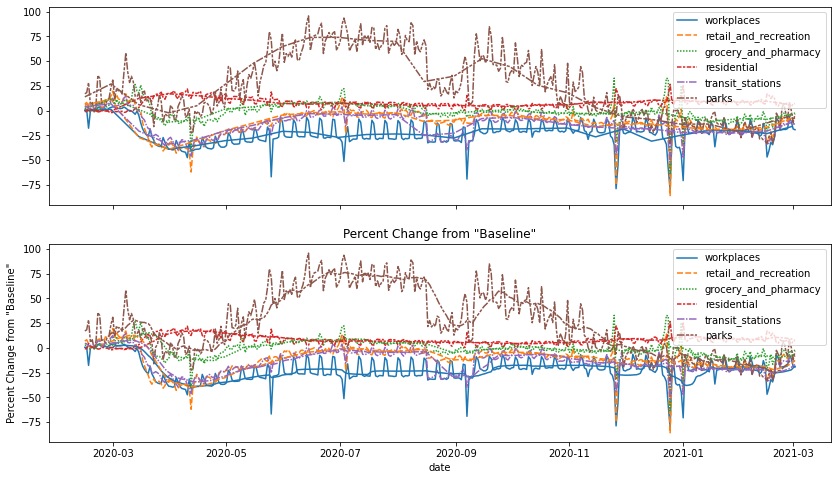

In [158]:
resample_rolling(d=14, f='SM')

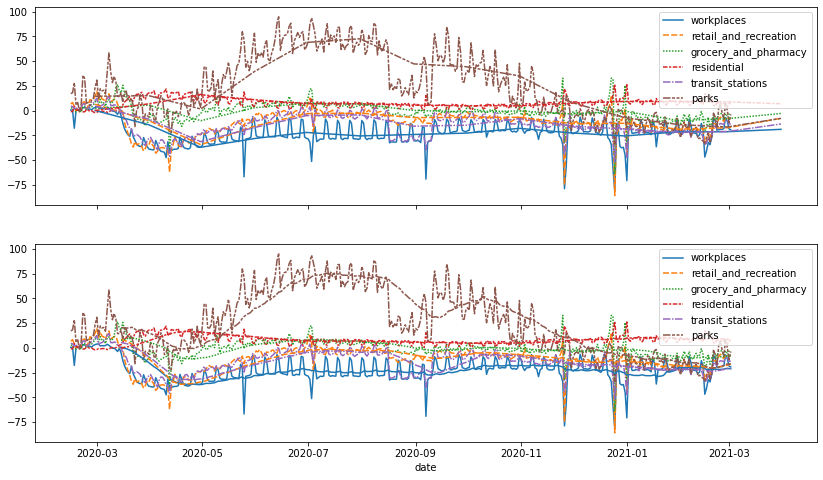

In [147]:
resample_rolling(d=30, f='M')

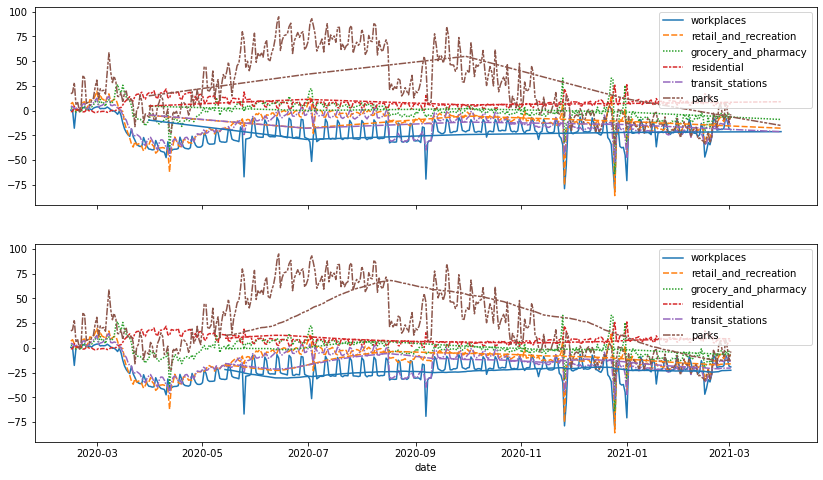

In [148]:
resample_rolling(d=90, f='Q')

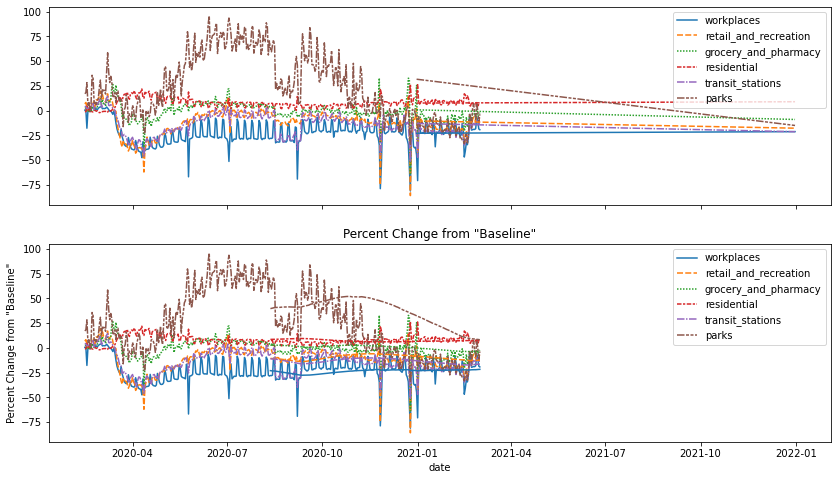

In [155]:
resample_rolling(d=180, f='BA')

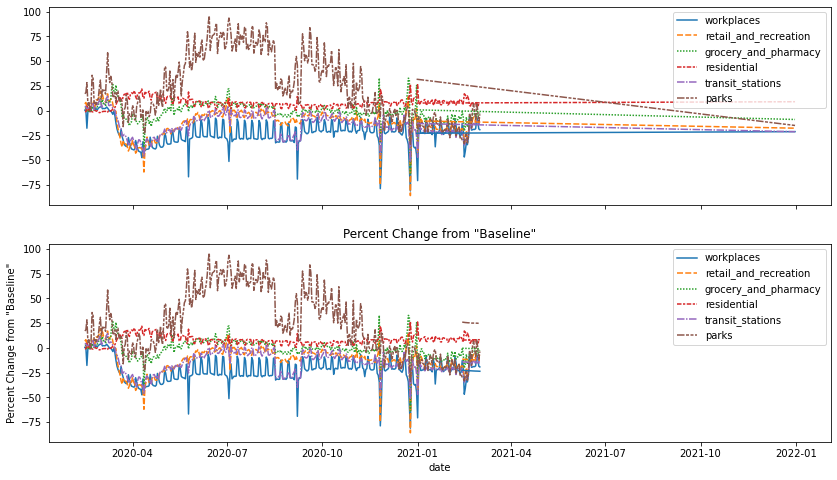

In [156]:
resample_rolling(d=365, f='Y')

In [ ]:
# Initialize AxesGrid, instantiate all "subplot" axes
grid = AxesGrid(fig, 
                111, # Similar to subplot(111)
                label_mode = 'L', # Display tick-labels at LEFT & BTTM locations only
                add_all = True, # False doesn't show subplots
                aspect = True, # True: widths & heights scaled according to data lims, False
                share_all=True, # xaxis & yaxis of all axes shared
                nrows_ncols=(4, 2), # Creates a 4x2 grid of axes
                axes_pad=0.5, # Pad b/w axes[inch]
                cbar_pad=2.0, # Pad b/w cbar and axis[inch]
                #cbar_location='right',
                cbar_set_cax = True, # Doesn't seem to make a difference
                #axes_class = AA.Axes,
                cbar_mode='None') # The AxesGrid cbar is empty for some reason